In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [19]:
# Plot misclassified images
import pandas as pd

def plot_misclasified_examples(x, true_lables, predicted_lables, n=5, print_misclassified=False, labels=None):
  misclassified_idx = np.where(predicted_lables != true_lables)[0]
  misclassified_random_idxes = np.random.choice(misclassified_idx, n*n)
  plt.figure(figsize=(15,15))
  for i in range(n*n):
      idx = misclassified_random_idxes[i]
      plt.subplot(n,n,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[idx], cmap='gray')
      if labels==None:
        plt.xlabel("True  %s, Pred: %s" % (true_lables[idx], predicted_lables[idx]))
      else:
        plt.xlabel("True  %s, Pred: %s" % (labels[true_lables[idx]], labels[predicted_lables[idx]]))
  plt.show()

  if print_misclassified:
      if labels==None:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                        'true':true_lables[misclassified_random_idxes],
                        'pred':predicted_lables[misclassified_random_idxes]}))
      else:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                        #'true':labels[true_lables[misclassified_random_idxes]],
                        'true':true_lables[misclassified_random_idxes],
                        #'pred':labels[predicted_lables[misclassified_random_idxes]]}))
                        'pred':predicted_lables[misclassified_random_idxes]}))

def plot_examples(x, y, cmap, labels=None):
  plt.figure(figsize=(15,15))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[i], cmap=cmap)
      if labels==None:
        plt.xlabel(y[i])
      else:
        plt.xlabel(labels[y[i]])
  plt.show()


In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

K = len(set(y_train))
print("number of classes:", K)

# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

number of classes: 10


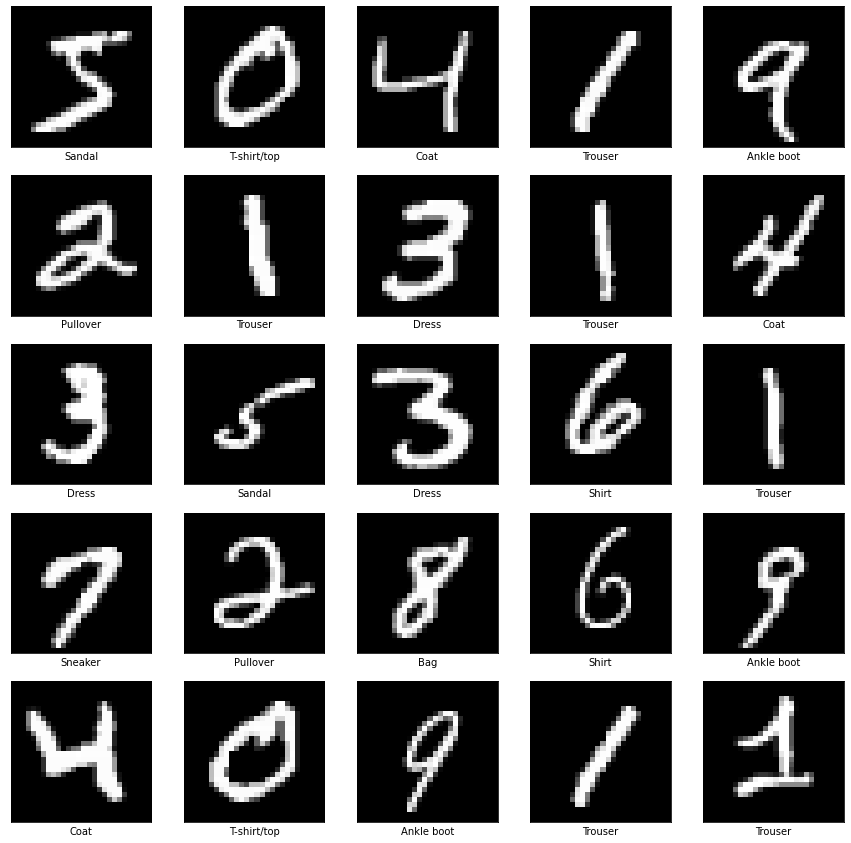

In [21]:
new_shape = (x_train.shape[0], x_train.shape[1], x_train.shape[2])
plot_examples(x_train.reshape(new_shape), y_train, cmap='gray', labels=labels)

In [22]:
N, T, D = x_train.shape

i = Input((T, D))
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.3526 - accuracy: 0.8869 - val_loss: 0.1271 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1060 - accuracy: 0.9680 - val_loss: 0.0948 - val_accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0712 - accuracy: 0.9782 - val_loss: 0.0644 - val_accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0701 - val_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0534 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0460 - val_accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0463 -

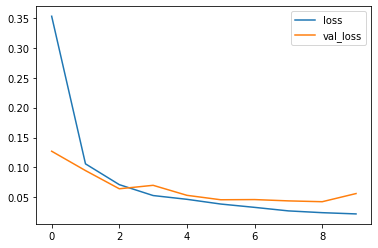

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

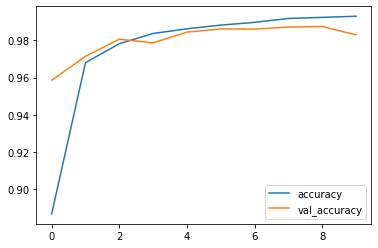

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[ 966    0    0    2    3    5    1    1    1    1]
 [   0 1122    7    1    0    1    2    1    1    0]
 [   1    1 1027    1    1    0    0    1    0    0]
 [   0    0    4 1002    0    2    0    1    1    0]
 [   0    0    0    0  940    0    2    5    3   32]
 [   1    0    3   20    0  861    2    0    5    0]
 [   3    1    1    0    2    5  945    0    1    0]
 [   1    2    4    1    2    1    0 1012    1    4]
 [   0    0    2    1    0    4    0    3  964    0]
 [   0    0    1    0    1    5    0    4    8  990]]


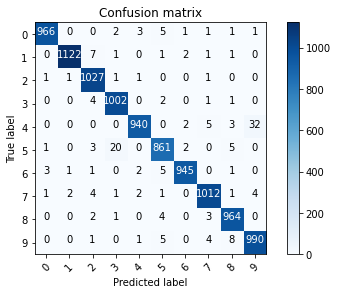

In [25]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

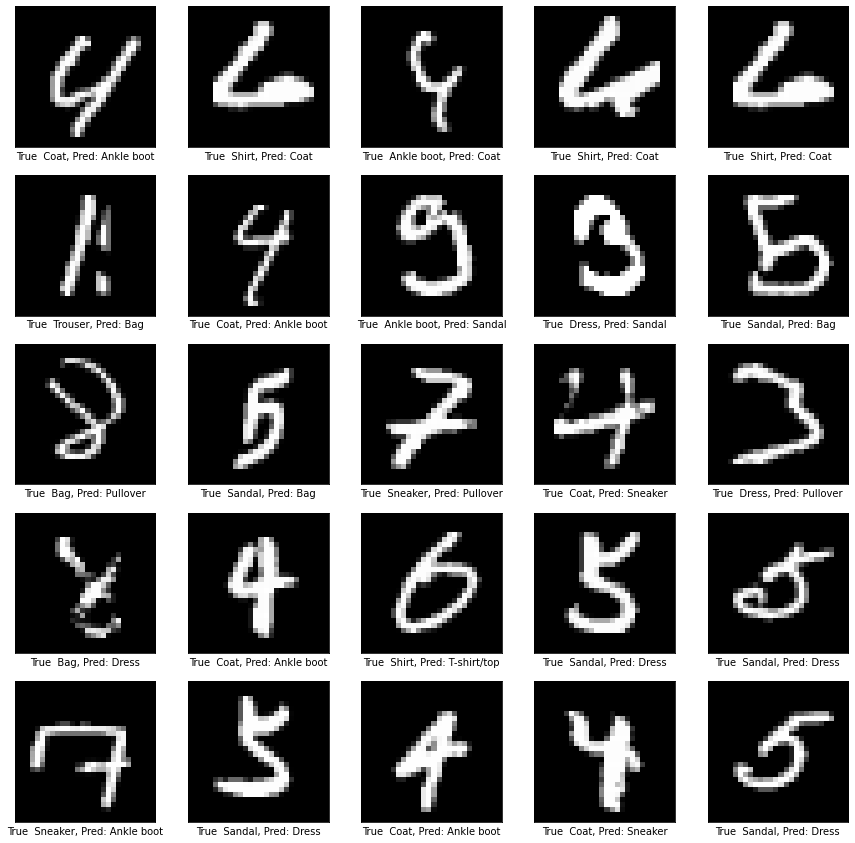

     idx  true  pred
0   4071     4     9
1   8311     6     4
2   1901     9     4
3    625     6     4
4   8311     6     4
5   5457     1     8
6   3718     4     9
7   1247     9     5
8   6011     3     5
9    720     5     8
10  1364     8     2
11  4300     5     8
12  2016     7     2
13  6559     4     7
14  2405     3     2
15  6625     8     3
16   707     4     9
17   965     6     0
18  9400     5     3
19  9777     5     3
20  3373     7     9
21  9422     5     3
22  1865     4     9
23  2386     4     7
24  9747     5     3


In [26]:
new_shape = (x_test.shape[0], x_test.shape[1], x_test.shape[2])
plot_misclasified_examples(x_test.reshape(new_shape), y_test, p_test, print_misclassified=True, labels=labels)